In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
train = pd.read_csv('D:/Data Mining/input/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('D:/Data Mining/input/test_Y3wMUE5_7gLdaTN.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,LGBT,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

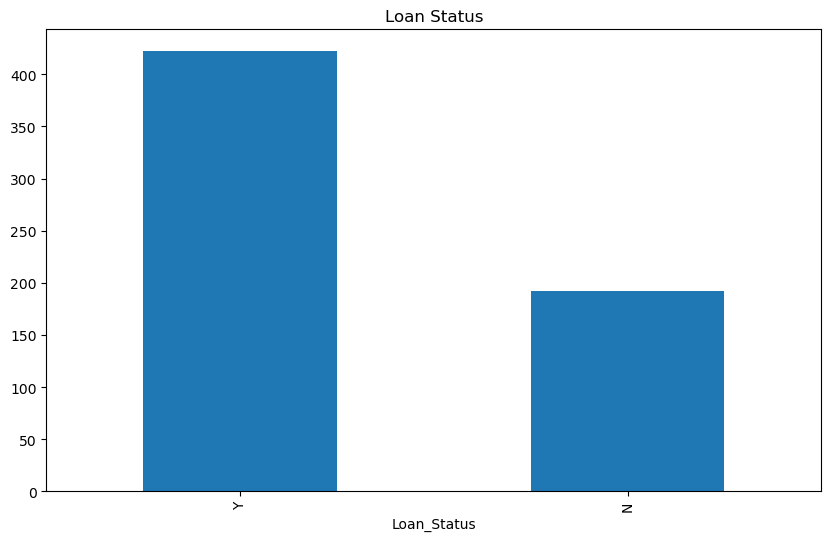

In [9]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')
plt.show()

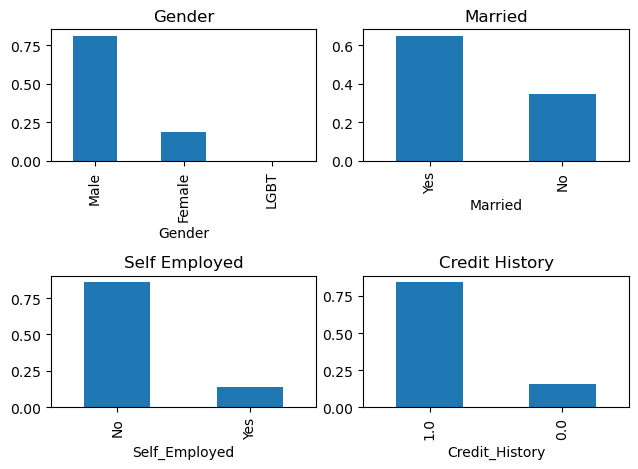

In [11]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

# Biểu đồ cho 'Married'
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

# Biểu đồ cho 'Self_Employed'
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

# Biểu đồ cho 'Credit_History'
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

plt.tight_layout()
plt.show()

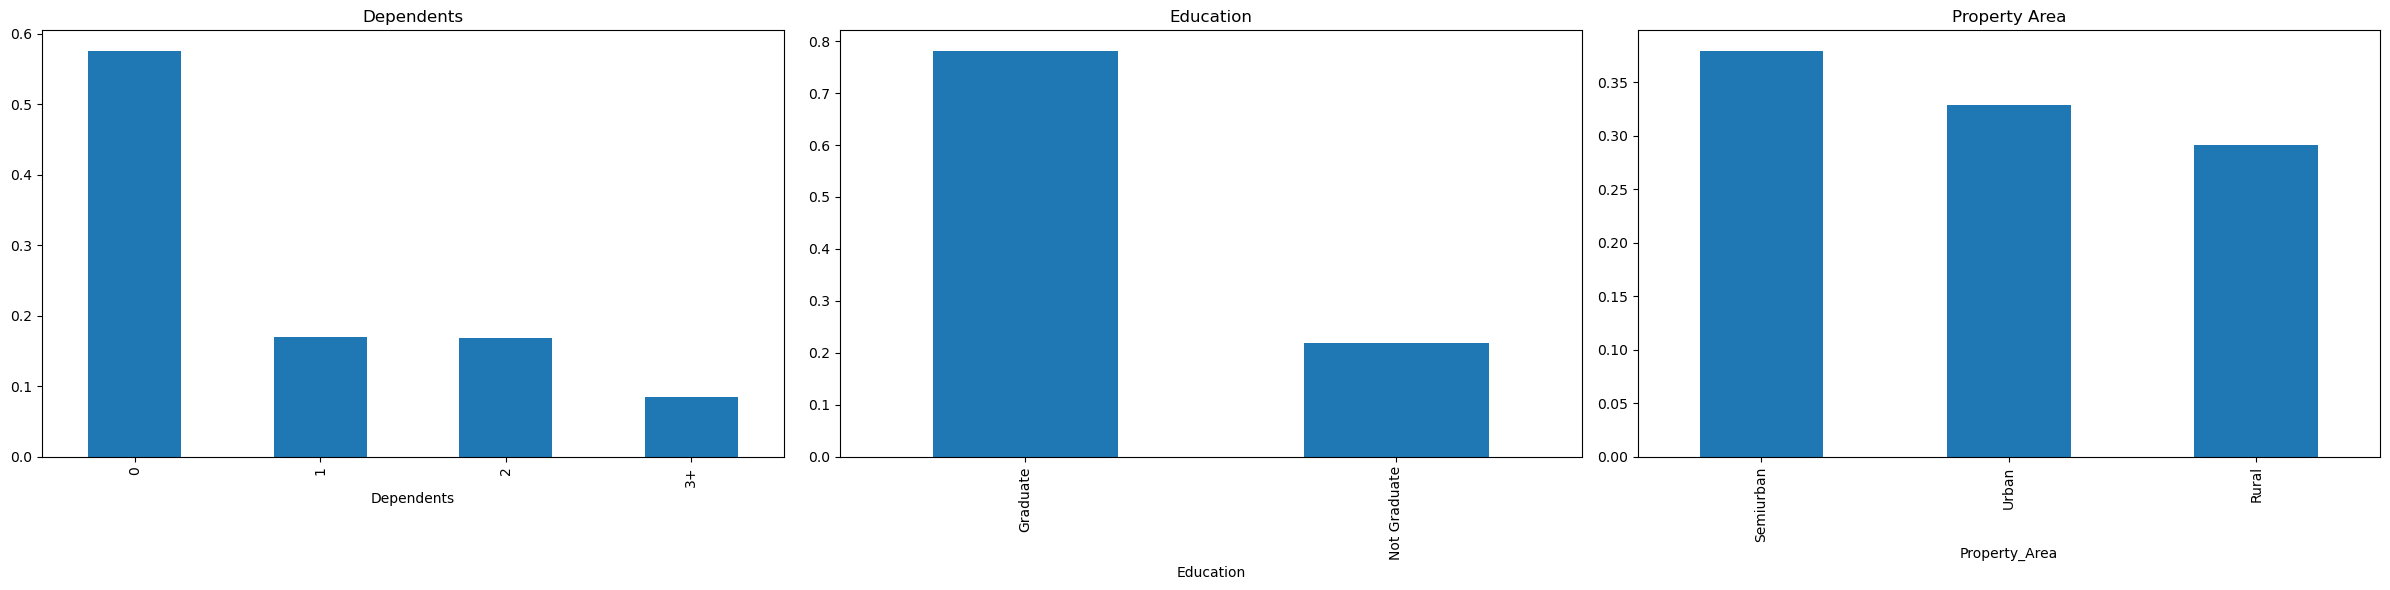

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

plt.tight_layout()
plt.show()

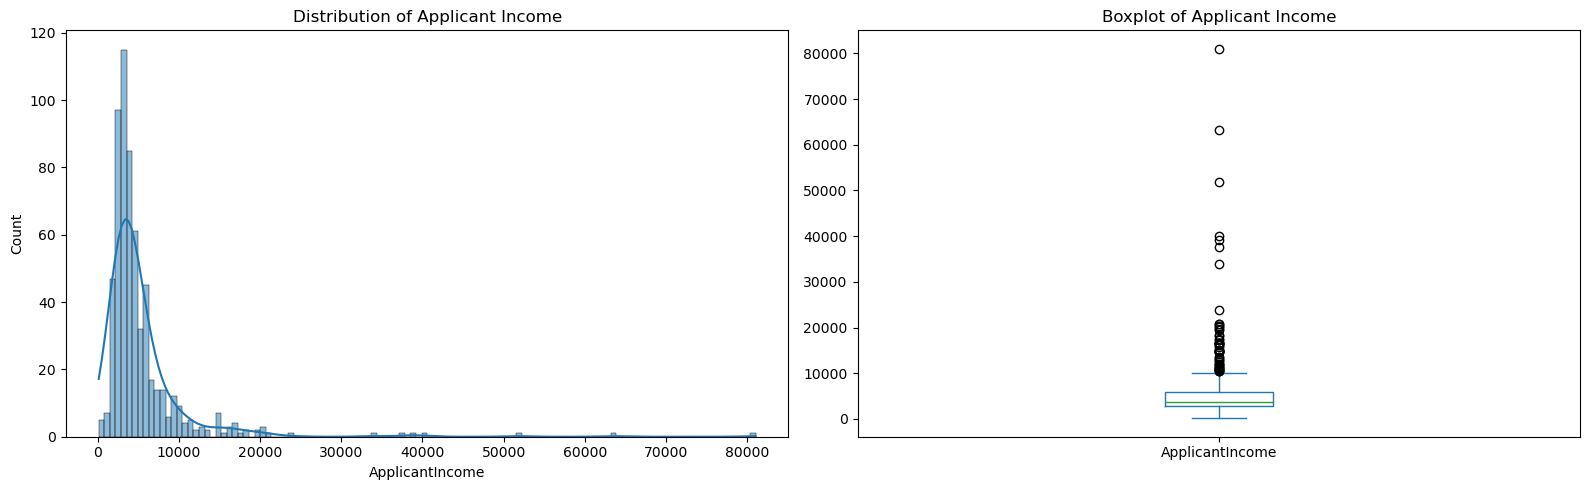

In [15]:
# Tạo figure
fig = plt.figure(figsize=(16, 5))

# Biểu đồ phân phối
ax1 = fig.add_subplot(121)
sns.histplot(train['ApplicantIncome'], kde=True, ax=ax1)
ax1.set_title('Distribution of Applicant Income')

# Boxplot
ax2 = fig.add_subplot(122)
train['ApplicantIncome'].plot.box(ax=ax2) 
ax2.set_title('Boxplot of Applicant Income')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

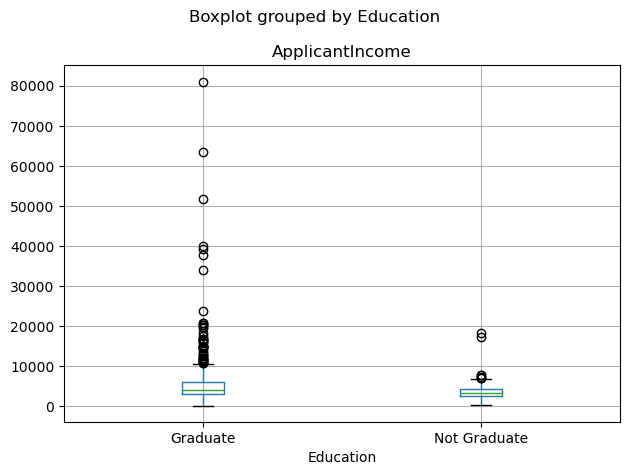

In [17]:
train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()
plt.show()

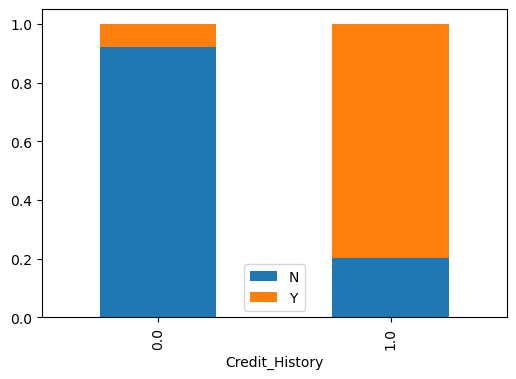

In [19]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')
plt.show()

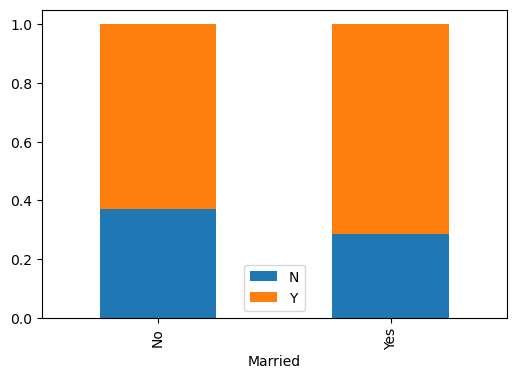

In [21]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')
plt.show()

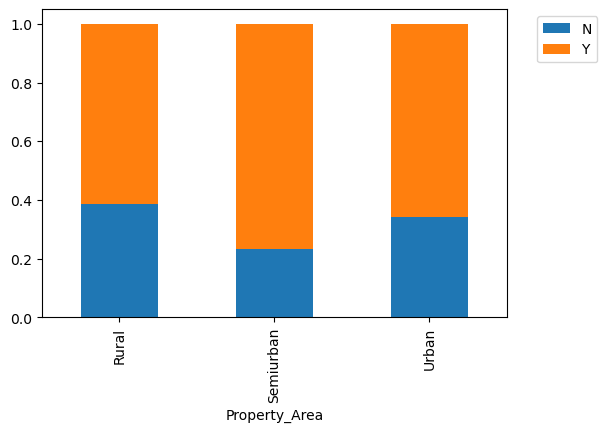

In [23]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')
plt.show()

In [25]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [27]:
bins = [0,2500,4000,6000,81000] 
group= ['Low', 'Average', 'High', 'Very High']

In [29]:
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

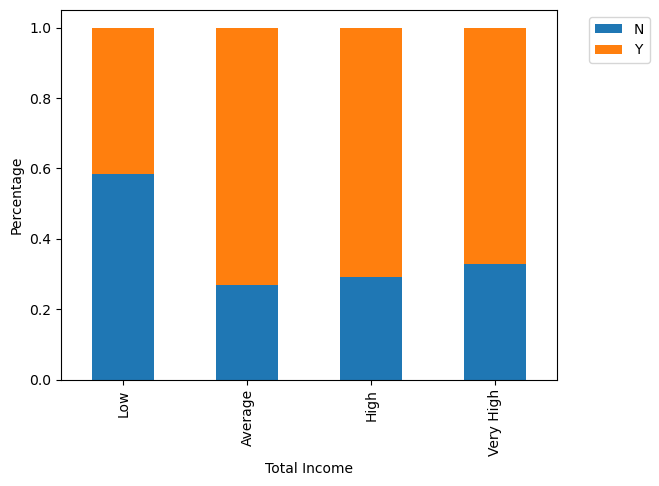

In [31]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best') 
plt.show()

In [33]:
train = train.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [35]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0, 'Y': 1})
train['Dependents'] = train['Dependents'].replace('3+', 3)
test['Dependents'] = test['Dependents'].replace('3+', 3)

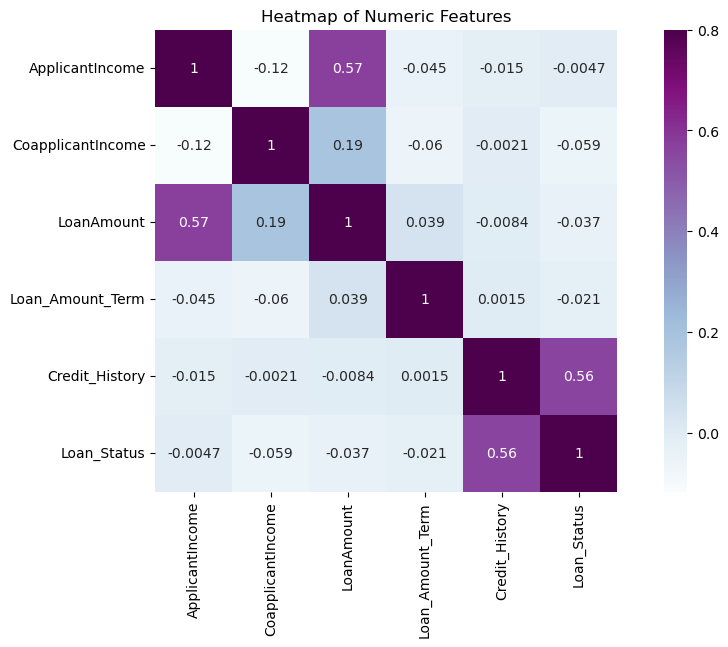

In [41]:
# Lọc chỉ các cột kiểu số
numeric_data = train.select_dtypes(include=['number'])

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), vmax=0.8, square=True, cmap='BuPu', annot=True)
plt.title('Heatmap of Numeric Features')
plt.show()

In [43]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
# Điền giá trị thiếu
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [47]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [51]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [53]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    return outliers

In [57]:
outlier_columns = []

In [59]:
for col in train.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(train, col)
    if not outliers.empty:
        outlier_columns.append(col)

In [61]:
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


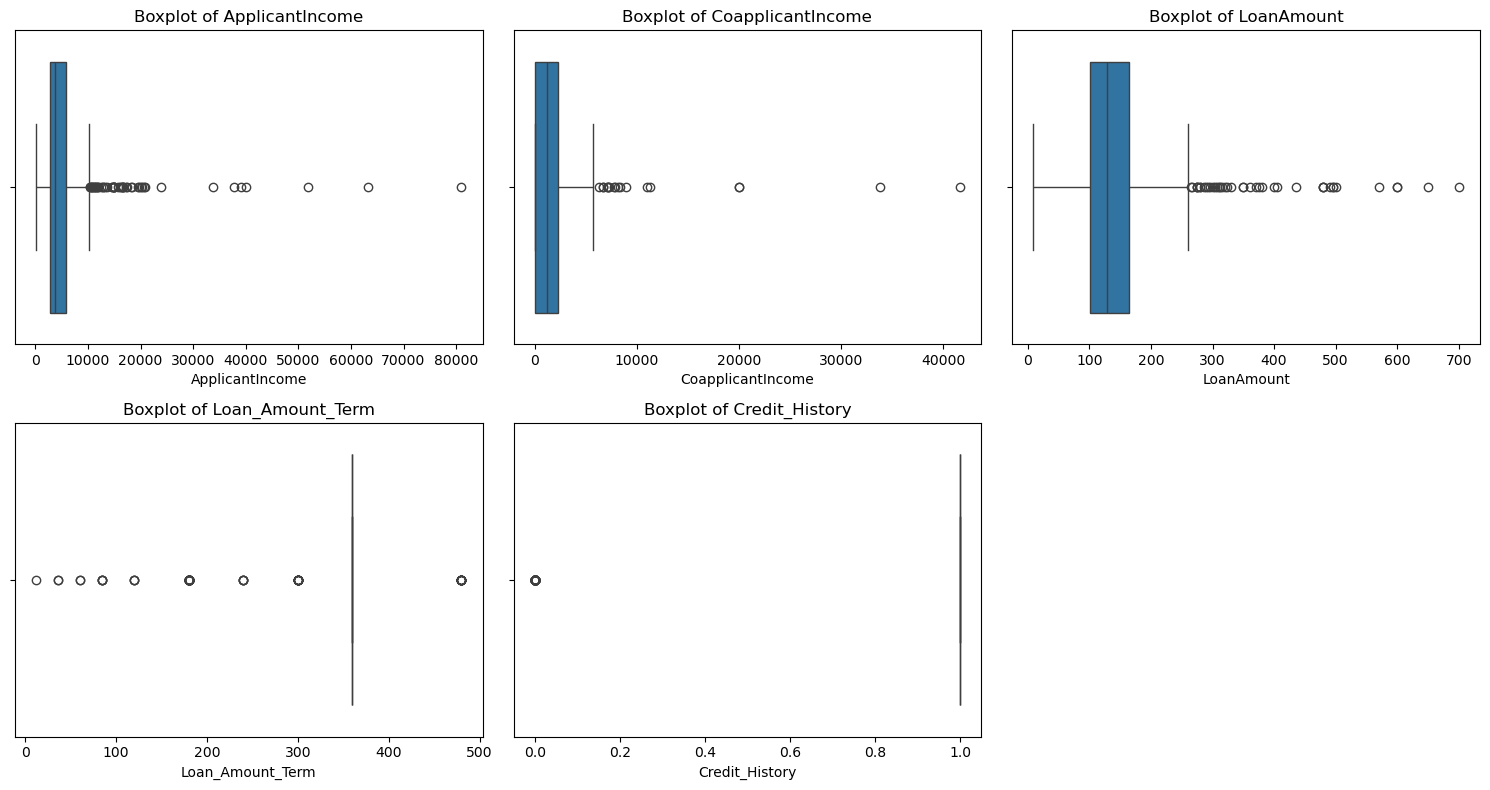

In [63]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, len(outlier_columns) // 2 + 1, i)
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [64]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [67]:
train = remove_outliers(train, 'ApplicantIncome')
train = remove_outliers(train, 'LoanAmount')
test = remove_outliers(test, 'ApplicantIncome')
test = remove_outliers(test, 'LoanAmount')

In [69]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [71]:
print(X)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    LGBT      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes          3      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0           

In [73]:
# Tạo dummy variables
train = pd.get_dummies(train, columns=['Gender'], drop_first=True)
test = pd.get_dummies(test, columns=['Gender'], drop_first=True)

# Đảm bảo test có cùng cột với train
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

test = test[train.columns.drop('Loan_Status')]

# Kiểm tra kết quả
print(train.columns)
print(test.columns)


Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_LGBT', 'Gender_Male'],
      dtype='object')
Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_LGBT',
       'Gender_Male'],
      dtype='object')


In [77]:
print(train)

      Loan_ID Married Dependents     Education Self_Employed  ApplicantIncome  \
0    LP001002      No          0      Graduate            No             5849   
1    LP001003     Yes          1      Graduate            No             4583   
2    LP001005     Yes          0      Graduate           Yes             3000   
3    LP001006     Yes          0  Not Graduate            No             2583   
4    LP001008      No          0      Graduate            No             6000   
..        ...     ...        ...           ...           ...              ...   
608  LP002974     Yes          0      Graduate            No             3232   
609  LP002978      No          0      Graduate            No             2900   
610  LP002979     Yes          3      Graduate            No             4106   
612  LP002984     Yes          2      Graduate            No             7583   
613  LP002990      No          0      Graduate           Yes             4583   

     CoapplicantIncome  Loa

In [75]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_cv)

In [79]:
print("Decision Tree Classification Report:")
print(classification_report(y_cv, predictions))

print("Decision Tree Accuracy Score:")
print(accuracy_score(y_cv, predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.54      0.57        48
           1       0.81      0.84      0.83       113

    accuracy                           0.75       161
   macro avg       0.70      0.69      0.70       161
weighted avg       0.75      0.75      0.75       161

Decision Tree Accuracy Score:
0.7515527950310559


In [81]:
rfmodel = RandomForestClassifier(n_estimators=500, random_state=42)
rfmodel.fit(X_train, y_train)
rfpredictions = rfmodel.predict(X_cv)

In [82]:
print("Random Forest Classification Report:")
print(classification_report(y_cv, rfpredictions))

print("Random Forest Accuracy Score:")
print(accuracy_score(y_cv, rfpredictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        48
           1       0.82      0.96      0.88       113

    accuracy                           0.82       161
   macro avg       0.82      0.73      0.75       161
weighted avg       0.82      0.82      0.80       161

Random Forest Accuracy Score:
0.8198757763975155


In [85]:
param_dist = {
    'n_estimators': randint(100, 1000),  # Random sampling for n_estimators
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': randint(2, 10),  # Random sampling for min_samples_split
    'min_samples_leaf': randint(1, 5),  # Random sampling for min_samples_leaf
    'bootstrap': [True, False]  # Random sampling for bootstrap
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                                      param_distributions=param_dist,
                                      n_iter=50,  # Number of random parameter combinations to try
                                      scoring='accuracy',
                                      cv=5,
                                      random_state=42,
                                      n_jobs=-1,
                                      verbose=2,
                                      return_train_score=True)

random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E7CE421100>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E7CE539B80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E7CE59A9F0>},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=2)

In [87]:
best_rf_model = random_search_rf.best_estimator_

In [89]:
rf_tuned_predictions = best_rf_model.predict(X_cv)
print("Tuned Random Forest Classification Report:")
print(classification_report(y_cv, rf_tuned_predictions))

print("Tuned Random Forest Accuracy Score:")
print(accuracy_score(y_cv, rf_tuned_predictions))

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        48
           1       0.82      0.96      0.89       113

    accuracy                           0.83       161
   macro avg       0.84      0.73      0.76       161
weighted avg       0.83      0.83      0.81       161

Tuned Random Forest Accuracy Score:
0.8260869565217391
